<a href="https://colab.research.google.com/github/Junrulin0225/Medical-Diagnosis-and-Drug-Treatment-Prediction/blob/main/Medical_Diagnosis_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🩺 Welcome to my Medical Diagnosis Prediction System!**

In this project, we want to analyze five cancer type and predict their outcome.
*   Diabetes
*   Liver Disease
*   Breast Cancer
*   Heart Disease
*   Chronic Kidney Disease

Then, we want to predict what drug to assign for patients with certain data.

*   Drug Treatment




In [ ]:
#import some modules we need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Required packages are installed!')

Required packages are installed!


In [ ]:
#import all the data
df_Diabetes= pd.read_csv('Diabetes.csv')
df_Liver_Disease = pd.read_csv('Liver Disease.csv')
df_Breast_Cancer = pd.read_csv('Breast Cancer.csv')
df_Heart_Disease = pd.read_csv('Heart Disease.csv')
df_CKD = pd.read_csv('Chronic Kidney Disease.csv')
df_Drug = pd.read_csv('Drug Treatment.csv')

# **🧋 Diabetes Dataset**

In [ ]:
df_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_Diabetes.shape

(768, 9)

No. of patients diagnosed with Diabetes:  268
No. of patients not diagnosed with Diabetes:  500


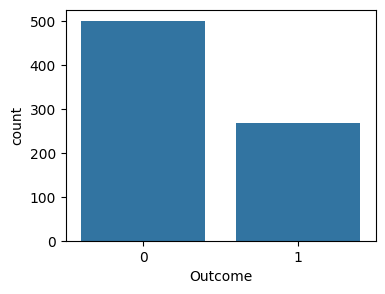

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x=df_Diabetes.Outcome)
NDB, DB  = df_Diabetes.Outcome.value_counts()
print('No. of patients diagnosed with Diabetes: ', DB)
print('No. of patients not diagnosed with Diabetes: ', NDB)

Seperate the columns into numeric and categorical.

In [ ]:
Diabetes_num = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
Diabetes_cat = ['Pregnancies','Outcome']

For numeric data, we want to see if there is skew and outliner we should keep in mind.

In [ ]:
df_Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Glucose', ylabel='Count'>

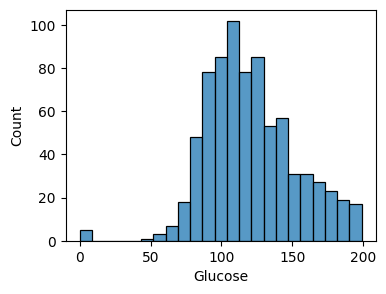

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[0]])

<Axes: ylabel='Glucose'>

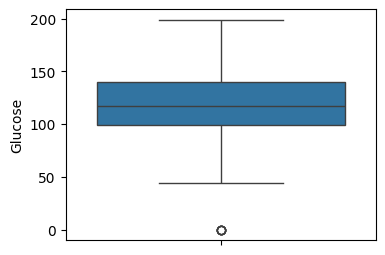

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(df_Diabetes[Diabetes_num[0]])

<Axes: xlabel='BloodPressure', ylabel='Count'>

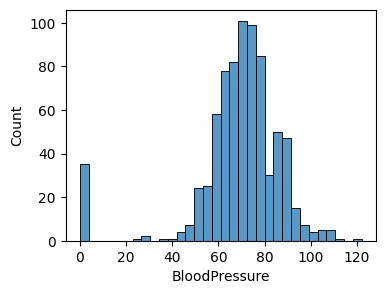

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[1]])

<Axes: xlabel='SkinThickness', ylabel='Count'>

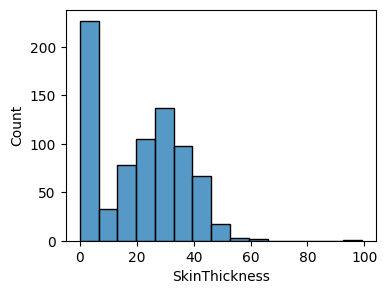

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[2]])

<Axes: xlabel='Insulin', ylabel='Count'>

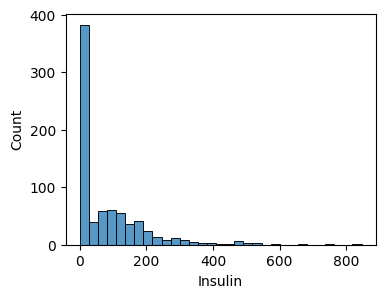

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[3]])

<Axes: ylabel='Insulin'>

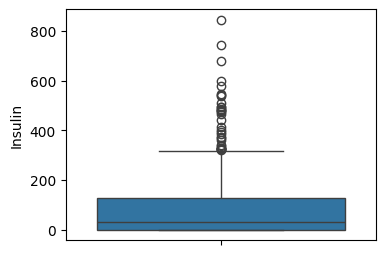

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(df_Diabetes[Diabetes_num[3]])

<Axes: xlabel='BMI', ylabel='Count'>

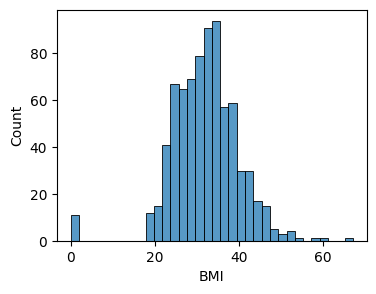

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[4]])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

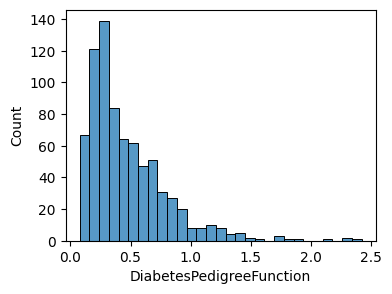

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[5]])

<Axes: ylabel='DiabetesPedigreeFunction'>

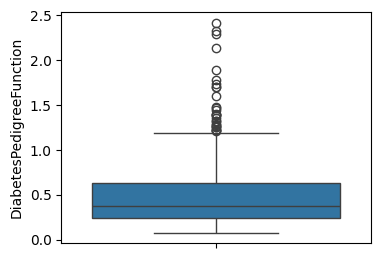

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(df_Diabetes[Diabetes_num[5]])

<Axes: xlabel='Age', ylabel='Count'>

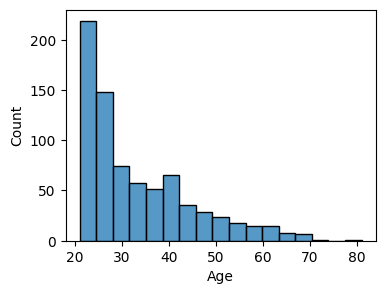

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Diabetes[Diabetes_num[6]])

<Axes: ylabel='Age'>

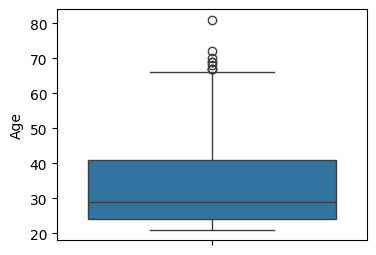

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(df_Diabetes[Diabetes_num[6]])

# **🍺 Liver Disease Dataset**

In [ ]:
df_Liver_Disease.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df_Liver_Disease.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Since there is 4 missing values only, the simpliest way is to fill the missing values with the mean.

In [ ]:
df_Liver_Disease.Albumin_and_Globulin_Ratio.fillna(df_Liver_Disease.Albumin_and_Globulin_Ratio.mean(), inplace= True)
df_Liver_Disease.Albumin_and_Globulin_Ratio.head()

0    0.90
1    0.74
2    0.89
3    1.00
4    0.40
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [ ]:
df_Liver_Disease.Albumin_and_Globulin_Ratio.isnull().sum()

0

In [ ]:
df_Liver_Disease.shape

(583, 11)

Instead of using get dummies or LabelEncoder, I decided to apply lambda function to convert Dataset column to 0 and 1.

In [ ]:
df_Liver_Disease.Dataset = df_Liver_Disease.Dataset.apply(lambda x:0 if x==1 else 1)
df_Liver_Disease.Dataset.head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

No. of patients diagnosed with liver disease:  416
No. of patients not diagnosed with liver disease:  167


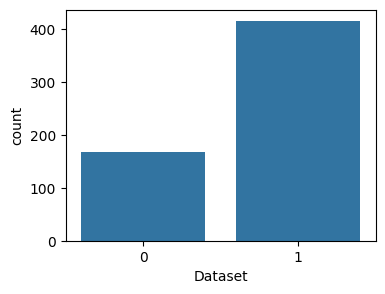

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x=df_Liver_Disease.Dataset)
LD, NLD = df_Liver_Disease['Dataset'].value_counts()
print('No. of patients diagnosed with liver disease: ',LD)
print('No. of patients not diagnosed with liver disease: ',NLD)

In [ ]:
df_Liver_Disease.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
df_Liver_Disease[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,1,Female,43.347826
3,1,Male,46.950617
0,0,Female,42.740000
1,0,Male,40.598291


Seperate the columns into numeric and categorical.

In [ ]:
LD_num = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']
LD_cat = ['Gender','Dataset']

<Axes: xlabel='Age', ylabel='Count'>

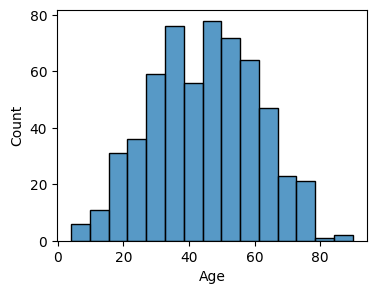

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[0]])

<Axes: xlabel='Total_Bilirubin', ylabel='Count'>

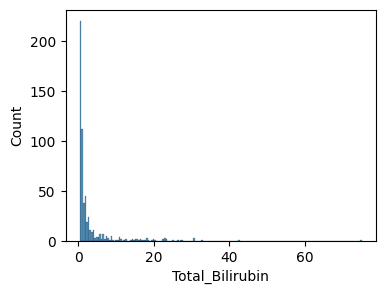

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[1]])

<Axes: xlabel='Direct_Bilirubin', ylabel='Count'>

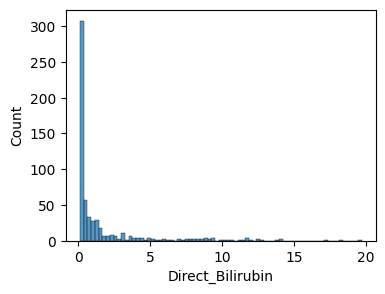

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[2]])

<Axes: xlabel='Direct_Bilirubin'>

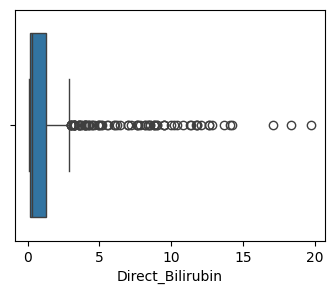

In [ ]:
plt.figure(figsize = (4,3))
sns.boxplot(x=df_Liver_Disease.Direct_Bilirubin)

<Axes: xlabel='Alkaline_Phosphotase', ylabel='Count'>

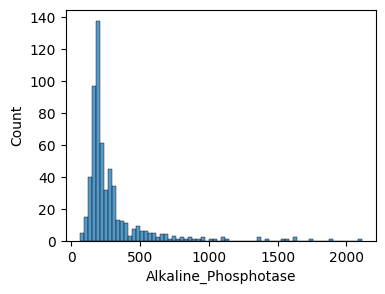

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[3]])

<Axes: xlabel='Alamine_Aminotransferase', ylabel='Count'>

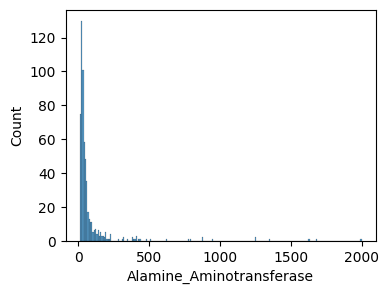

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[4]])

<Axes: xlabel='Aspartate_Aminotransferase', ylabel='Count'>

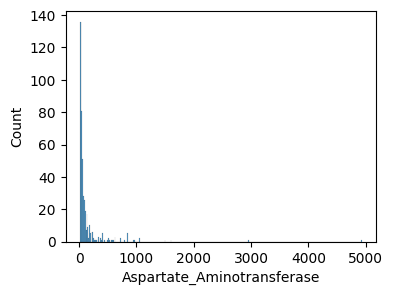

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[5]])

<Axes: xlabel='Total_Protiens', ylabel='Count'>

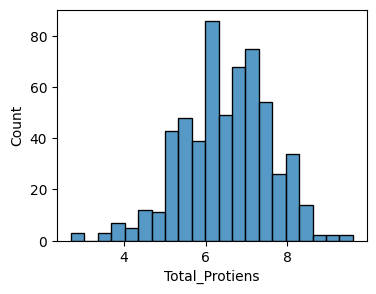

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[6]])

<Axes: xlabel='Albumin', ylabel='Count'>

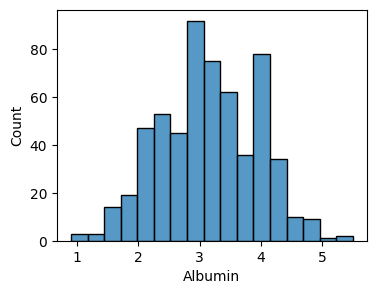

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[7]])

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Count'>

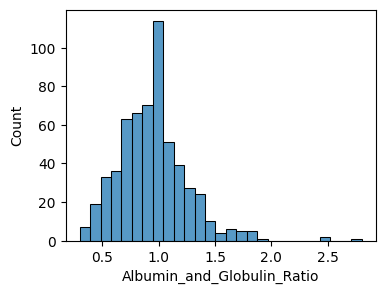

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(df_Liver_Disease[LD_num[8]])

There is too much skew. One of the ways to preprocess the skew before training the model is to do **log transformation**.

In [ ]:
skew_LD_col= ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

np.log(df_Liver_Disease[skew_LD_col]).head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio
0,-0.356675,-2.302585,5.231109,2.772589,2.890372,-0.105361
1,2.388763,1.704748,6.549651,4.158883,4.605170,-0.301105
2,1.987874,1.410987,6.194405,4.094345,4.219508,-0.116534
3,0.000000,-0.916291,5.204007,2.639057,2.995732,0.000000
4,1.360977,0.693147,5.273000,3.295837,4.077537,-0.916291


We can build function for log transformation for later use.

In [ ]:
#note: How do you handle negative values in log transformation? add a constant value to the data prior to applying the log transform. The transformation is therefore log(Y+a) where a is the constant. Some people like to choose a so that min(Y+a) is a very small positive number (like 0.001).
def log_trans(skew_LD_col):
  df_Liver_Disease[skew_LD_col] = ((np.log(df_Liver_Disease[skew_LD_col])))
  return df_Liver_Disease.head()

log_trans(skew_LD_col)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,-0.105361,1
1,62,Male,2.388763,1.704748,6.549651,4.158883,4.605170,7.5,3.2,-0.301105,1
2,62,Male,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,-0.116534,1
3,58,Male,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,0.000000,1
4,72,Male,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,-0.916291,1


After log transformation, the skew is improved.

<Axes: xlabel='Total_Bilirubin', ylabel='Count'>

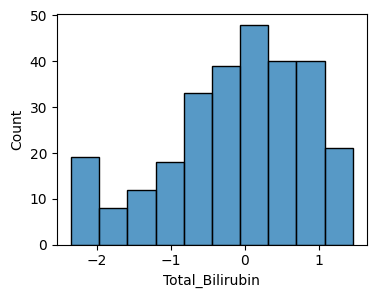

In [ ]:
# before log transformation
plt.figure(figsize = (4,3))
sns.histplot(x = df_Liver_Disease.Total_Bilirubin)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Total_Bilirubin', ylabel='Count'>

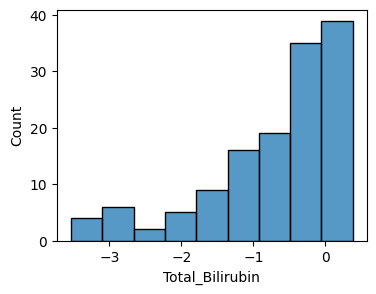

In [ ]:
# after log transformation
plt.figure(figsize = (4,3))
sns.histplot(x = np.log(df_Liver_Disease.Total_Bilirubin))

# **👩 Breast Cancer Dataset**

In [ ]:
df_Breast_Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df_Breast_Cancer.drop('id', axis = 1, inplace = True)

In [ ]:
df_Breast_Cancer.info()

In [ ]:
df_Breast_Cancer.isnull().sum()

In [ ]:
df_Breast_Cancer.shape

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x=df_Breast_Cancer.diagnosis)
B, M  = df_Breast_Cancer.diagnosis.value_counts()
print('No. of patients diagnosed with Breast Cancer: ', M)
print('No. of patients not diagnosed with Breast Cancer: ', B)

Now, we can convert M and B into categorical values.

B(benign) = 0

M(malignant) = 1


In [ ]:
#Encode categorical values
#iloc[:,1] = df['diagnosis']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df_Breast_Cancer.iloc[:,0])

In [ ]:
df_Breast_Cancer['diagnosis'] = le.fit_transform(df_Breast_Cancer.iloc[:,0])
df_Breast_Cancer.head()

In [ ]:
df_Breast_Cancer.rename(columns={'diagnosis': 'num_diagnosis'}, inplace=True)
df_Breast_Cancer.head()

In [ ]:
#sns.pairplot(data = df_Breast_Cancer.iloc[:, 1:10], hue='num_diagnosis')

In [ ]:
df_Breast_Cancer.iloc[:,0:12].corr()

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_Breast_Cancer.iloc[:,0:12].corr(), annot = True, fmt = '.0%')

# **🫀 Heart Disease Dataset**

This dataset includes the following features:

*   **age**:   The age of the patient.
*   **sex**:   Gender of the patient (0: female, 1: male).
*   **cp**:    Type of chest pain.
(0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic)

*   **trestbps**: Resting blood pressure.
*   **chol**: Serum cholesterol.
*   **fbs**: Fasting blood sugar > 120 mg/dl.
*   **restecg**: Resting electrocardiographic results.
(0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy)

*   **thalach**: Maximum heart rate achieved.
*   **exang**: Exercise induced angina.
*   **oldpeak**: ST depression induced by exercise relative to rest
*   **Slope of the peak exercise ST segment**:
(0: Upsloping
1: Flat
2: Downsloping)

*   **ca**: Number of major vessels (0-4) colored by fluoroscopy
*   **thal**: Thalium stress test result:
(0: Normal
1: Fixed defect
2: Reversible defect
3: Not described)

*   **target**: Heart disease status (0 = no disease, 1 = presence of disease)

In [ ]:
df_Heart_Disease.head()

In [ ]:
df_Heart_Disease.info()

In [ ]:
df_Heart_Disease.isnull().sum()

In [ ]:
df_Heart_Disease.shape

In [ ]:
df_Heart_Disease.drop_duplicates(inplace = True)
df_Heart_Disease.shape

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x=df_Heart_Disease.target)
NHD, HD  = df_Heart_Disease.target.value_counts()
print('No. of patients diagnosed with Heart Disease: ', HD)
print('No. of patients not diagnosed with Heart Disease: ', NHD)

Seperate the columns into continuous and categorical.

In [ ]:
HD_cont = ['age','trestbps', 'chol','oldpeak' ]
HD_cat = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal' ]
df_HD_cont = df_Heart_Disease[HD_cont]
df_HD_cat = df_Heart_Disease[HD_cat]

Check the relationship between the target and the continuous variables.

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(data = df_HD_cont, x='age', hue= df_Heart_Disease.target, multiple = 'stack')

In [ ]:
plt.figure(figsize = (4,3))
sns.kdeplot(data = df_HD_cont, x='age', hue= df_Heart_Disease.target)

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(data = df_HD_cont, x='trestbps', hue= df_Heart_Disease.target, multiple = 'stack')

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(data = df_HD_cont, x='chol', hue= df_Heart_Disease.target, multiple = 'stack')

In [ ]:
plt.figure(figsize = (4,3))
sns.histplot(data = df_HD_cont, x='oldpeak', hue= df_Heart_Disease.target, multiple = 'stack')

Check the relationship between the target and the categorical variables.

In [ ]:
df_Heart_Disease['sex'].value_counts()

In [ ]:
sex_count = ((df_Heart_Disease['sex'].value_counts())/302) *100

In [ ]:
plt.figure(figsize = (4,3))
sex_count.plot(kind = 'barh', title= 'Percentage of Sex (Heart Disease)', xlabel = 'Percentage(%)', ylabel = 'sex', width = 0.8)

Normailize makes them the same height.

In [ ]:
cross_tab_sex = pd.crosstab(index=df_Heart_Disease['sex'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_sex.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_cp = pd.crosstab(index=df_Heart_Disease['cp'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_cp.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_fbs = pd.crosstab(index=df_Heart_Disease['fbs'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_fbs.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_fbs = pd.crosstab(index=df_Heart_Disease['restecg'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_fbs.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_fbs = pd.crosstab(index=df_Heart_Disease['exang'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_fbs.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_fbs = pd.crosstab(index=df_Heart_Disease['slope'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_fbs.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_fbs = pd.crosstab(index=df_Heart_Disease['ca'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_fbs.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

In [ ]:
cross_tab_fbs = pd.crosstab(index=df_Heart_Disease['thal'], columns=df_Heart_Disease['target'], normalize='index')
cross_tab_fbs.plot(kind='bar', stacked=True, width=0.8,ylabel='Proportion')

Check outliners.

In [ ]:
df_HD_cont.describe()

In [ ]:
plt.figure(figsize = (4,3))
plt.boxplot(df_Heart_Disease.trestbps)

Convert categorical data to one hot code(get dummies).

In [ ]:
# Need One-Hot Encoding: cp, restecg, thal
# no need for one hot encode: ordinal variable, binary
#one_hot_encoded_df_HD = pd.get_dummies(df_Heart_Disease, columns = ['cp', 'restecg', 'thal'], drop_first = True)

In [ ]:
#one_hot_encoded_df_HD.head()

# **🫘 Chroic Kidney Disease Dataset**

The data was taken over a 2-month period in India with 25 features.
This dataset includes the following features:
*   **bp**		:	blood pressure
*   **sg**		:	specific gravity
*   **al**		: albumin
*   **su**		:	sugar
*   **rbc**		:	red blood cells
*   **pc**		:	pus cell
*   **pcc**		:	pus cell clumps
*   **ba**		:	bacteria
*   **bgr**		:	blood glucose random
*   **bu**		:	blood urea
*   **sc**		:	serum creatinine
*   **sod**		:	sodium
*   **pot**		:	potassium
*   **hemo**	:	hemoglobin
*   **pcv**		:	packed cell volume
*   **wc**		:	white blood cell count
*   **rc**		:	red blood cell count
*   **htn**		:	hypertension
*   **dm**		:	diabetes mellitus
*   **cad**		:	coronary artery disease
*   **appet**	:	appetite
*   **pe**		:	pedal edema
*   **ane**		:	anemia

In [ ]:
df_CKD.head()

In [ ]:
df_CKD.drop('id', axis = 1, inplace = True)

In [ ]:
df_CKD.shape

In [ ]:
df_CKD.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df_CKD.head()

In [ ]:
df_CKD.isnull().sum()

In [ ]:
df_CKD.info()

Some columns are supposed to be numeric.

errors = 'coerce' is to turn non-cat values into NaN, it is a very useful technique!

In [ ]:
to_num_col = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count' ]
for n in to_num_col:
  df_CKD[n] = pd.to_numeric(df_CKD[n], errors='coerce')

In [ ]:
df_CKD.dtypes

Seperate the columns into numeric and categorical.

In [ ]:
CKD_num = [n for n in df_CKD.columns if df_CKD[n].dtypes != 'object']
CKD_cat = [n for n in df_CKD.columns if df_CKD[n].dtypes == 'object']

In [ ]:
# check the categorical columns
for n in CKD_cat:
  print(f'"{n}" has values: {df_CKD[n].unique()}')

In [ ]:
df_CKD['class'].value_counts()

So we notice that there are some incorrect values in some columns:


*   diabetes_mellitus
*   coronary_artery_disease
*   class

In [ ]:
df_CKD['diabetes_mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes':'yes'}, inplace = True)
df_CKD['coronary_artery_disease'].replace({'\tno': 'no'}, inplace = True)
df_CKD['class'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'}, inplace = True)

for n in ['diabetes_mellitus', 'coronary_artery_disease', 'class']:
  print(f'"{n}" has values: {df_CKD[n].unique()}')

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x=df_CKD['class'])
NCKD, CKD  = df_CKD['class'].value_counts()
print('No. of patients diagnosed with Chronic Kidney Disease: ', CKD)
print('No. of patients not diagnosed with Chronic Kidney Disease: ', NCKD)

In [ ]:
df_CKD.describe()

Check numerical distribution for Chronic Kidney Disease.

In [ ]:
plt.figure(figsize = (15,10))
num_plot = 1
for col in CKD_num:
  if num_plot <=14:
    ax = plt.subplot(3, 5, num_plot)
    sns.histplot(df_CKD[col])
    plt.xlabel(col)

  num_plot += 1

plt.tight_layout()
plt.show()

Check categorical distribution for Chronic Kidney Disease.

In [ ]:
# check cat_col distribution
plt.figure(figsize = (15, 10))
num_plot = 1
for col in CKD_cat:
    if num_plot < 11:
        ax = plt.subplot(3, 4, num_plot)
        sns.countplot(df_CKD[col])
        plt.xlabel(col)

    num_plot += 1

plt.tight_layout()
plt.show()

Now, let's check missing value.

In [ ]:
df_CKD.isnull().sum().sort_values(ascending= False)

To fill the missing values, we will use

*   For high null values -> **random sampling**

*   For low null values -> fill up with **mean**




In [ ]:
def random_sample_imputation(feature):
    random_sample = df_CKD[feature].dropna().sample(df_CKD[feature].isna().sum())
    random_sample.index = df_CKD[df_CKD[feature].isnull()].index
    df_CKD.loc[df_CKD[feature].isnull(), feature] = random_sample

for col in CKD_num:
    random_sample_imputation(col)

In [ ]:
df_CKD.isnull().sum().sort_values(ascending= False)

In [ ]:
random_sample_imputation('red_blood_cells')
random_sample_imputation('pus_cell')

In [ ]:
df_CKD.isnull().sum().sort_values(ascending= False)

In [ ]:
df_CKD['pus_cell_clumps'].isnull().any()

In [ ]:
#df_CKD['pus_cell_clumps','bacteria','coronary_artery_disease','diabetes_mellitus','hypertension','aanemia','peda_edema','appetite'].fillna()

for col in df_CKD.columns:
  if df_CKD[col].isnull().any() == True:
    df_CKD[col] = df_CKD[col].fillna(0)
  else:
    df_CKD[col]

In [ ]:
df_CKD.isnull().sum().sort_values(ascending= False)

In [ ]:
CKD_cat

In [ ]:
df_CKD[CKD_cat]

In [ ]:
df_CKD['pus_cell_clumps'].unique()

In [ ]:
df_CKD['pus_cell_clumps'] = df_CKD['pus_cell_clumps'].apply(lambda x:0 if x=='notpresent' else 1)

In [ ]:
df_CKD['bacteria'].unique()

In [ ]:
df_CKD['bacteria'] = df_CKD['bacteria'].apply(lambda x:0 if x=='notpresent' else 1)

In [ ]:
df_CKD['hypertension'].unique()

In [ ]:
df_CKD['hypertension'] = df_CKD['hypertension'].apply(lambda x:0 if x=='no' else 1)

In [ ]:
df_CKD['diabetes_mellitus'].unique()

In [ ]:
df_CKD['diabetes_mellitus'] = df_CKD['diabetes_mellitus'].apply(lambda x:0 if x=='no' else 1)

In [ ]:
df_CKD['coronary_artery_disease'].unique()

In [ ]:
df_CKD['coronary_artery_disease'] = df_CKD['coronary_artery_disease'].apply(lambda x:0 if x=='no' else 1)

In [ ]:
df_CKD['appetite'].unique()

In [ ]:
df_CKD['appetite'] = df_CKD['appetite'].apply(lambda x:0 if x=='poor' else 1)

In [ ]:
df_CKD['peda_edema'].unique()

In [ ]:
df_CKD['peda_edema'] = df_CKD['peda_edema'].apply(lambda x:0 if x=='no' else 1)

In [ ]:
df_CKD['aanemia'].unique()

In [ ]:
df_CKD['aanemia'] = df_CKD['aanemia'].apply(lambda x:0 if x=='no' else 1)

Now, we convert the categorical data into numeric form by using LabelEncoder.

In [ ]:
#le.fit_transform(df_Breast_Cancer.iloc[:,0])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_CKD['red_blood_cells'] = le.fit_transform(df_CKD['red_blood_cells'])
df_CKD['pus_cell'] = le.fit_transform(df_CKD['pus_cell'])
df_CKD['class'] = le.fit_transform(df_CKD['class'])

# for col in CKD_cat:
#   df_CKD[col] = le.fit_transform(df_CKD[col])

df_CKD.head()

In [ ]:
df_CKD.corr()

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_CKD.corr(), annot = True, fmt = '.0%')

# **💊 Drug Treatment Dataset**

In this session, we are going to do drug classification to predict what kind of drug to assign to our patients.

In [ ]:
df_Drug.head()

In [ ]:
df_Drug.info()

In [ ]:
df_Drug.shape

In [ ]:
df_Drug.isnull().sum()

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x=df_Drug.Drug)
df_Drug.Drug.value_counts()

🔟 **Numerical variables:** Age, Na_to_K

We can check their statitics to see whether there is skew or not.

In [ ]:
Drug_num = ['Age','Na_to_K']
df_Drug[Drug_num].describe()

In [ ]:
plt.figure(figsize = (10,6))
plot_number = 1

for col in Drug_num:
  if plot_number <=2:
    ax = plt.subplot(3,3, plot_number)
    plot = sns.histplot(data = df_Drug, x= col)
    plot_number += 1

plt.tight_layout()
plot

In [ ]:
plt.figure(figsize = (10,6))
plot_number = 1
for col in Drug_num:
  if plot_number <=2:
    ax = plt.subplot(3,3, plot_number)
    plot = sns.boxplot(data= df_Drug, y= col, x= df_Drug.Drug)
    plot_number += 1

plt.tight_layout()
plot

📊 **Categorical variables:** Sex, BP, Cholesterol, Drug

In [ ]:
Drug_cat = ['Sex', 'BP','Cholesterol', 'Drug']

In [ ]:
plt.figure(figsize = (10,6))
plot_number = 1
for col in Drug_cat:
  if plot_number <= 4:
    cat_of_col = df_Drug[col].value_counts()
    ax = plt.subplot(3,3, plot_number)
    plot = sns.countplot(data = df_Drug, x= col, hue = col)
    print(cat_of_col)
    plot_number += 1

plt.tight_layout()
plot

In [ ]:
pd.crosstab(df_Drug.Sex,df_Drug.Drug).plot(kind="bar",figsize=(6,4))
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

In [ ]:
pd.crosstab(df_Drug.BP,df_Drug.Cholesterol).plot(kind="bar",figsize=(6,4))
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

In [ ]:
sns.scatterplot(x=df_Drug.Age, y=df_Drug.Na_to_K, hue =df_Drug.Drug)

In [ ]:
plt.scatter(x=df_Drug.Age[df_Drug.Sex=='F'], y=df_Drug.Na_to_K[df_Drug.Sex=='F'], c="Blue")
plt.scatter(x=df_Drug.Age[df_Drug.Sex=='M'], y=df_Drug.Na_to_K[df_Drug.Sex=='M'], c="Orange")
plt.title('Na to K Ratio based on Gender and Age ')
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
need_to_encode = ['Sex','BP','Cholesterol']
for col in need_to_encode:
  df_Drug[col] = le.fit_transform(df_Drug[col])
df_Drug.head()

In [ ]:
numeric_drug = le.fit_transform(df_Drug['Drug'])
Drug_mapping = dict(zip(df_Drug['Drug'], numeric_drug))
Drug_mapping

In [ ]:
df_Drug.BP.value_counts()

# **🦾 Time for fit and predict the model**

Define x and y for each cancer first.

In [ ]:
# Diabetes
x_DB= df_Diabetes.drop(columns=['Pregnancies','Outcome'])
y_DB= df_Diabetes.Outcome

# Liver Disease
x_LD= df_Liver_Disease.drop(columns=['Gender','Dataset'])
y_LD= df_Liver_Disease.Dataset

#Breast Cancer
#if x, y need to be transformed to np array -> .values
x_BC = df_Breast_Cancer.iloc[:, 1:30]
y_BC = df_Breast_Cancer.iloc[:,0]

# Heart Disease
x_HD = df_Heart_Disease.drop(columns=['sex','target'])
y_HD = df_Heart_Disease.target

# Chronic Kidney Disease
x_CKD = df_CKD.iloc[:, :24]
y_CKD = df_CKD.iloc[:,24]

# Drug Treatment
x_Drug = df_Drug.drop(columns = 'Drug', axis=1)
y_Drug = df_Drug.Drug

Now, we split and standarize each data from each cancer.

In [ ]:
def split_and_standarize(x, y):
  #split data into training and test data
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.25,shuffle = True, random_state= 53, stratify=y)
  return x_train, x_test, y_train, y_test
  #standarize the data
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.fit_transform(x_test)
  return  x_train,  x_test

x_DB_train, x_DB_test, y_DB_train, y_DB_test = split_and_standarize(x_DB, y_DB)
x_LD_train, x_LD_test, y_LD_train, y_LD_test = split_and_standarize(x_LD, y_LD)
x_BC_train, x_BC_test, y_BC_train, y_BC_test = split_and_standarize(x_BC, y_BC)
x_HD_train, x_HD_test, y_HD_train, y_HD_test = split_and_standarize(x_HD, y_HD)
x_CKD_train, x_CKD_test, y_CKD_train, y_CKD_test = split_and_standarize(x_CKD, y_CKD)
x_Drug_train, x_Drug_test, y_Drug_train, y_Drug_test = split_and_standarize(x_Drug, y_Drug)


In [ ]:
def models(x_train, y_train):
  #logistic regression
  from sklearn.linear_model import LogisticRegression
  logis = LogisticRegression(random_state=0).fit(x_train,y_train)
  #decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0).fit(x_train,y_train)
  #random forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(criterion = 'entropy', random_state=0).fit(x_train,y_train)
  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
  #SVM
  from sklearn import svm
  svm_model = svm.SVC(kernel='linear').fit(x_train,y_train)

  print('[0]score of logistic regression model: ' , logis.score(x_train, y_train))
  print('[1]score of decision tree model: ' , tree.score(x_train, y_train))
  print('[2]score of random forest model: ' , forest.score(x_train, y_train))
  print('[3]score of KNN model: ' , neigh.score(x_train, y_train))
  print('[4]score of SVM model: ' , svm_model.score(x_train, y_train))
  return logis, tree, forest, neigh, svm_model

In [ ]:
model_DB = models(x_DB_train, y_DB_train)
model_LD = models(x_LD_train, y_LD_train)
model_BC = models(x_BC_train, y_BC_train)
model_HD = models(x_HD_train, y_HD_train)
model_CKD = models(x_CKD_train, y_CKD_train)
model_Drug = models(x_Drug_train, y_Drug_train)

After the models are fitted, we want to see the accuracy/ performance of all cancers with 5 models.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# for i in range(5):
#   print()
#   print(f'model {i+1}')
#   print(classification_report(y_test, model[i].predict(x_LD_test)))
#   print(f'accuracy score is {accuracy_score(y_test, model[i].predict(x_LD_test)).round(2)}')

def accuracy(name, model, x_test, y_test):
  print()
  print(f'The accuracy for {name}')
  for i in range(5):
    print(f'model {i+1}')
    print(classification_report(y_test, model[i].predict(x_test)))
    print(f'accuracy score is {accuracy_score(y_test, model[i].predict(x_test)).round(2)}')

accuracy('Diabetes', model_DB, x_DB_test, y_DB_test)
accuracy('Liver Disease', model_LD, x_LD_test, y_LD_test)
accuracy('Breast Cancer', model_BC, x_BC_test, y_BC_test)
accuracy('Heart Disease', model_HD, x_HD_test, y_HD_test)
accuracy('Chronic Kidney Disease', model_CKD, x_CKD_test, y_CKD_test)
accuracy('Drug dataset', model_Drug, x_Drug_test, y_Drug_test)

In [ ]:
def accuarcy_score_only(model, x_test, y_test):
  accuracy_log = accuracy_score(y_test, model[0].predict(x_test)).round(2)
  accuracy_tree = accuracy_score(y_test, model[1].predict(x_test)).round(2)
  accuracy_random = accuracy_score(y_test, model[2].predict(x_test)).round(2)
  accuracy_knn = accuracy_score(y_test, model[3].predict(x_test)).round(2)
  accuracy_svm = accuracy_score(y_test, model[4].predict(x_test)).round(2)
  return accuracy_log, accuracy_tree, accuracy_random, accuracy_knn, accuracy_svm

accuracy_for_DB = accuarcy_score_only(model_DB, x_DB_test, y_DB_test)
accuracy_for_LD = accuarcy_score_only(model_LD, x_LD_test, y_LD_test)
accuracy_for_BC = accuarcy_score_only(model_BC, x_BC_test, y_BC_test)
accuracy_for_HD = accuarcy_score_only(model_HD, x_HD_test, y_HD_test)
accuracy_for_CKD = accuarcy_score_only(model_CKD, x_CKD_test, y_CKD_test)
accuracy_for_Drug = accuarcy_score_only(model_Drug, x_Drug_test, y_Drug_test)

In [ ]:
dic = {'model': ['logistic', 'decision tree', 'random forest', 'KNN', 'SVM'],
       'Diabetes': accuracy_for_DB,
       'Liver Disease': accuracy_for_LD,
       'Breast Cancer': accuracy_for_BC,
       'Heart_Disease': accuracy_for_HD,
       'Chronic Kidney Disease': accuracy_for_CKD,
       'Drug Dataset':accuracy_for_Drug}
df = pd.DataFrame(data=dic)
df.set_index('model', inplace=True)
df

We can see that the best moodel for all cancers is SVM.

In [ ]:
df.plot(kind = 'line', title= 'Accuracy Across Disease', xlabel = 'model', ylabel = 'accuracy score')

# **🎰 Ready for Deployment**

Now, we want to create an input for users to enter the correlated data. So we can predict outcome from the data users enter.


First, I want to observe how training data is supposed to look like.

In [ ]:
x_DB_train.head()

In [ ]:
type(x_DB_train)

In [ ]:
x_DB_test.head()

Now, we want to create new x_test for each cancer type.

In [1356]:
#create a new x_DB_test
def create_new_xDBtest():
  user_Glucose = input('Please enter the glucose level: ')
  user_BP = input('Please enter the blood pressure: ')
  user_ST = input('Please enter the skin thickness: ')
  user_Insulin = input('Please enter the insulin: ')
  user_BMI = input('Please enter the BMI: ')
  user_DPF = input('Please enter the Diabetes Pedigree Function: ')
  user_age_DB = input('Please enter the age: ')


  name = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
        'DiabetesPedigreeFunction', 'Age']
  user = [user_Glucose,user_BP,user_ST,user_Insulin,user_BMI,user_DPF,user_age_DB]
  dic = {name: user for name, user in zip(name,user)}
  new_x_DB_test = pd.DataFrame(data=dic, index=[0])
  return new_x_DB_test

In [1357]:
def create_new_xLDtest():
  # remember to convert to log
  import math
  user_age_liver = input('Please enter the age: ')
  user_TB = input('Please enter the total bilirubin: ')
  user_DB = input('Please enter the direct bilirubin: ')
  user_AP = input('Please enter the alkaline phosphotase: ')
  user_AlA = input('Please enter the alamine aminotransferase: ')

  user_AsA = input('Please enter the aspartate aminotransferase: ')
  user_TP = input('Please enter the total protiens: ')
  user_Albumin = input('Please enter the albumin: ')
  user_AG = input('Please enter the albumin and globulin_Ratio: ')


  name = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
  user = [user_age_liver,user_TB,user_DB,user_AP,user_AlA,user_AsA,user_TP,user_Albumin,user_AG]
  user = [math.log10(float(num)) for num in user]
  dic = {name: user for name, user in zip(name,user)}
  new_x_LD_test = pd.DataFrame(data=dic, index=[0])
  return new_x_LD_test

In [1358]:
def create_new_xBCtest():

  user_radius_mean = input('Please enter the radius mean: ')
  user_texture_mean = input('Please enter the texture mean: ')
  user_perimeter_mean = input('Please enter the perimeter mean: ')
  user_area_mean = input('Please enter the area mean: ')
  user_smoothness_mean = input('Please enter the smoothness mean: ')

  user_compactness_mean = input('Please enter the compactness mean: ')
  user_concavity_mean = input('Please enter the concavity mean: ')
  user_concave_points_mean = input('Please enter the concave points mean: ')
  user_symmetry_mean = input('Please enter the symmetry mean: ')
  user_fractal_dimension_mean = input('Please enter the fractal dimension mean: ')

  user_radius_se = input('Please enter the radius_se: ')
  user_texture_se = input('Please enter the texture_se: ')
  user_perimeter_se = input('Please enter the perimeter_se: ')
  user_area_se = input('Please enter the area_se: ')
  user_smoothness_se = input('Please enter the smoothness_se: ')

  user_compactness_se = input('Please enter the compactness_se: ')
  user_concavity_se = input('Please enter the concavity_se: ')
  user_concave_points_se = input('Please enter the concave points_se: ')
  user_fractal_dimension_se = input('Please enter the fractal_dimension_se: ')
  user_radius_worst = input('Please enter the radius_worst: ')

  user_texture_worst = input('Please enter the texture_worst: ')
  user_perimeter_worst = input('Please enter the perimeter_worst: ')
  user_area_worst = input('Please enter the area_worst: ')
  user_smoothness_worst = input('Please enter the smoothness_worst: ')
  user_compactness_worst = input('Please enter the compactness_worst: ')

  user_concavity_worst = input('Please enter the concavity_worst: ')
  user_concave_points_worst = input('Please enter the concave points_worst: ')
  user_symmetry_worst = input('Please enter the symmetry_worst: ')
  user_fractal_dimension_worst = input('Please enter the fractal_dimension_worst: ')



  name = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
  user = [
          user_radius_mean, user_texture_mean, user_perimeter_mean, user_area_mean, user_smoothness_mean,
          user_compactness_mean, user_concavity_mean, user_concave_points_mean, user_symmetry_mean, user_fractal_dimension_mean,
          user_radius_se, user_texture_se, user_perimeter_se, user_area_se, user_smoothness_se,
          user_compactness_se, user_concavity_se, user_concave_points_se, user_fractal_dimension_se, user_radius_worst,
          user_texture_worst, user_perimeter_worst, user_area_worst, user_smoothness_worst, user_compactness_worst,
          user_concavity_worst, user_concave_points_worst, user_symmetry_worst, user_fractal_dimension_worst
          ]
  dic = {name: user for name, user in zip(name,user)}
  new_x_BC_test = pd.DataFrame(data=dic, index=[0])
  return new_x_BC_test

In [1359]:
def create_new_xHDtest():
  user_age_HD = input('Please enter the age: ')
  user_cp = input('Please enter the Type of chest pain: ')
  user_trestbps = input('Please enter the Resting blood pressure: ')
  user_chol = input('Please enter the Serum cholesterol: ')
  user_fbs = input('Please enter the Fasting blood sugar: ')

  user_restecg = input('Please enter the Resting electrocardiographic results: ')
  user_thalach = input('Please enter the Maximum heart rate achieved: ')
  user_exang = input('Please enter the Exercise induced angina: ')
  user_oldpeak = input('Please enter the ST depression induced by exercise relative to rest: ')
  user_slope = input('Please enter the Slope of the peak exercise ST segment: ')

  user_ca = input('Please enter the Number of major vessels colored by fluoroscopy: ')
  user_thal = input('Please enter the Thalium stress test result: ')


  name = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
  user = [
          user_age_HD, user_cp, user_trestbps, user_chol, user_fbs,
          user_restecg, user_thalach, user_exang, user_oldpeak, user_slope,
          user_ca, user_thal
          ]
  dic = {name: user for name, user in zip(name,user)}
  new_x_HD_test = pd.DataFrame(data=dic, index=[0])
  return new_x_HD_test


In [1361]:
def create_new_xCKDtest():
  user_age_CKD = input('Please enter the age: ')
  user_bp_CKD = input('Please enter the blood pressure: ')
  user_sg = input('Please enter the specific gravity: ')
  user_al = input('Please enter the albumin: ')
  user_su = input('Please enter the sugar: ')

  user_rbc = input('Please enter the red blood cells: ')
  user_pc = input('Please enter the pus cell: ')
  user_pcc = input('Please enter the pus cell clumps: ')
  user_ba = input('Please enter the bacteria: ')
  user_bgr = input('Please enter the blood glucose random: ')

  user_bu = input('Please enter the blood urea: ')
  user_sc = input('Please enter the serum creatinine: ')
  user_sod = input('Please enter the sodium: ')
  user_pot = input('Please enter the potassium: ')
  user_hemo = input('Please enter the hemoglobin: ')

  user_pcv = input('Please enter the packed cell volume: ')
  user_wc = input('Please enter the white blood cell count: ')
  user_rc = input('Please enter the red blood cell count: ')
  user_htn = input('Please enter the hypertension: ')
  user_dm = input('Please enter the diabetes mellitus: ')

  user_cad = input('Please enter the coronary artery disease: ')
  user_appet = input('Please enter the appetite: ')
  user_pe = input('Please enter the pedal edema: ')
  user_ane = input('Please enter the anemia: ')


  name = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia']
  user = [
          user_age_CKD, user_bp_CKD, user_sg, user_al, user_su,
          user_rbc, user_pc, user_pcc, user_ba, user_bgr,
          user_bu, user_sc, user_sod, user_pot, user_hemo,
          user_pcv, user_wc, user_rc, user_htn, user_dm,
          user_cad, user_appet, user_pe, user_ane
          ]
  dic = {name: user for name, user in zip(name,user)}
  new_x_CKD_test = pd.DataFrame(data=dic, index=[0])
  return new_x_CKD_test

In [1362]:
def create_new_xDrugtest():
  user_age_Drug = input('Please enter the age: ')
  user_sex = input('Please enter the gender: ')
  user_bp_Drug = input('Please enter the blood pressure: ')
  user_chol_Drug = input('Please enter the Cholesterol: ')
  user_Na_to_K = input('Please enter the Na/k ratio: ')


  name = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
  user = [user_age_Drug, user_sex, user_bp_Drug, user_chol_Drug, user_Na_to_K]
  dic = {name: user for name, user in zip(name,user)}
  new_x_Drug_test = pd.DataFrame(data=dic, index=[0])
  return new_x_Drug_test

In [1363]:
def make_prediction(x_train, y_train, x_test, cancer_name):
  from sklearn import svm
  svm_model = svm.SVC(kernel='linear')
  svm_model = svm_model.fit(x_train,y_train)
  predict_ans = svm_model.predict(x_test)
  if predict_ans.any() ==0:
    print(f'This patient is not likely to have {cancer_name}!')
  else:
    print(f'This patient has potentially {cancer_name}!')

In [1364]:
drug_or_cancer = input("Do you want to predict 'Drug Treatment' or 'Disease Outcome': ")
if drug_or_cancer == 'Drug Treatment':
  new_x_Drug_test = create_new_xDrugtest()
  from sklearn import svm
  svm_model = svm.SVC(kernel='linear')
  svm_model = svm_model.fit(x_Drug_train,y_Drug_train)
  predict_ans = svm_model.predict(x_Drug_test)
  for key, value in Drug_mapping.items():
    if value == predict_ans.item():
      print(f'The drug this patient should take is {key}')



if drug_or_cancer == 'Disease Outcome':
  choose_cancer= input('Please enter the disease or cancer type: ').lower()
  if choose_cancer == 'diabetes':
    new_x_DB_test = create_new_xDBtest()
    make_prediction(x_DB_train, y_DB_train, new_x_DB_test, 'Diabetes')
  elif choose_cancer == 'liver disease':
    new_x_LD_test = create_new_xLDtest()
    make_prediction(x_LD_train, y_LD_train, new_x_LD_test, 'Liver Disease')

  elif choose_cancer == 'breast cancer':
    new_x_BC_test = create_new_xBCtest()
    make_prediction(x_BC_train, y_BC_train, new_x_BC_test, 'Breast Cancer')

  elif choose_cancer == 'heart disease':
    new_x_HD_test = create_new_xHDtest()
    make_prediction(x_HD_train, y_HD_train, new_x_HD_test, 'Heart Disease')

  elif choose_cancer == 'chronic kidney disease':
    new_x_CKD_test = create_new_xCKDtest()
    make_prediction(x_CKD_train, y_CKD_train, new_x_CKD_test, 'Chronic Kidney Disease')

  else:
    print('Sorry, this is not a valid input.')

Do you want to predict 'Drug Treatment' or 'Disease Outcome': Disease Outcome
Please enter the disease or cancer type: diabetes
Please enter the glucose level: 10
Please enter the blood pressure: 20.5
Please enter the skin thickness: 32
Please enter the insulin: 15.2
Please enter the BMI: 24
Please enter the Diabetes Pedigree Function: 42.5
Please enter the age: 60
This patient has potentially Diabetes!
